<a href="https://colab.research.google.com/github/codeplinth/pytorchbootcamp/blob/master/PyTorch_29_DeepNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn,optim
from torch.utils.data import Dataset,DataLoader
import torchvision
from torchvision import datasets,transforms
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
torch.manual_seed(2)

In [ ]:
#Create a Deep Neural network using Sigmoid activation
class Sigmoid_Net(nn.Module):
  def __init__(self,D_in,H1,H2,D_out):
    super(Sigmoid_Net,self).__init__()
    self.l1 = nn.Linear(D_in,H1)
    self.l2 = nn.Linear(H1,H2)
    self.l3 = nn.Linear(H2,D_out)
    self.sigmoid = nn.Sigmoid()
  def forward(self,x):
    out1 = self.sigmoid(self.l1(x))
    out2 = self.sigmoid(self.l2(out1))
    y_pred = self.l3(out2)
    return y_pred

In [ ]:
#Create a Deep Neural network using Tanh activation
class Tanh_Net(nn.Module):
  def __init__(self,D_in,H1,H2,D_out):
    super(Tanh_Net,self).__init__()
    self.l1 = nn.Linear(D_in,H1)
    self.l2 = nn.Linear(H1,H2)
    self.l3 = nn.Linear(H2,D_out)
    self.tanh = nn.Tanh()
  def forward(self,x):
    out1 = self.tanh(self.l1(x))
    out2 = self.tanh(self.l2(out1))
    y_pred = self.l3(out2)
    return y_pred

In [ ]:
#Create a Deep Neural network using ReLU activation
class ReLU_Net(nn.Module):
  def __init__(self,D_in,H1,H2,D_out):
    super(ReLU_Net,self).__init__()
    self.l1 = nn.Linear(D_in,H1)
    self.l2 = nn.Linear(H1,H2)
    self.l3 = nn.Linear(H2,D_out)
    self.relu = nn.ReLU()
  def forward(self,x):
    out1 = self.relu(self.l1(x))
    out2 = self.relu(self.l2(out1))
    y_pred = self.l3(out2)
    return y_pred

In [ ]:
#Define the training function
def train_model(model,optimizer,criterion,trainloader,validationloader,EPOCHS=100):
  metrics = {'training_loss':[] ,'validation_accuracy':[]}
  for epoch in range(EPOCHS):
    for _,(x,y) in enumerate(trainloader):
      z_pred = model(x.view(-1,1*28*28))
      loss = criterion(z_pred,y)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      metrics['training_loss'].append(loss.item())

    correct = 0  
    for x_val,y_val in validationloader:
      z = model(x_val.view(-1,1*28*28))
      _,y_pred = torch.max(z,1)
      correct += (y_pred == y_val).sum().item()
    
    accuracy = (100 * correct)/len(validation_dataset)
    metrics['validation_accuracy'].append(accuracy)
  
  return metrics

In [ ]:
#create the training dataset
train_dataset = datasets.MNIST(root = '../mnist_data',train=True,transform = transforms.ToTensor(),download=True)

In [ ]:
#create the validiton dataset
validation_dataset = datasets.MNIST(root = '../mnist_data',train=False,transform = transforms.ToTensor(),download=True)

In [ ]:
#create the criterion 
criterion = nn.CrossEntropyLoss()

In [ ]:
#create train and validation loader
trainloader = DataLoader(dataset=train_dataset,batch_size=2000,shuffle=True)
validationloader = DataLoader(dataset=validation_dataset,batch_size=5000,shuffle=False)

In [ ]:
#set the parameters for the model
D_in = 1*28*28
H1 = 50
H2 = 50
D_out = 10
EPOCHS = 10
learning_rate = 0.01

In [ ]:
#Model training with Sigmoid function
model_sigmoid = Sigmoid_Net(D_in,H1,H2,D_out)
optimizer = optim.SGD(model_sigmoid.parameters(),lr= learning_rate)
metrics_sigmoid=train_model(model_sigmoid,optimizer,criterion,trainloader,validationloader,EPOCHS)

In [ ]:
#Model training with Tanh function
model_tanh = Tanh_Net(D_in,H1,H2,D_out)
optimizer = optim.SGD(model_tanh.parameters(),lr= learning_rate)
metrics_tanh =train_model(model_tanh,optimizer,criterion,trainloader,validationloader,EPOCHS)

In [ ]:
#Model training with ReLU function
model_relu = ReLU_Net(D_in,H1,H2,D_out)
optimizer = optim.SGD(model_relu.parameters(),lr= learning_rate)
metrics_relu=train_model(model_relu,optimizer,criterion,trainloader,validationloader,EPOCHS)

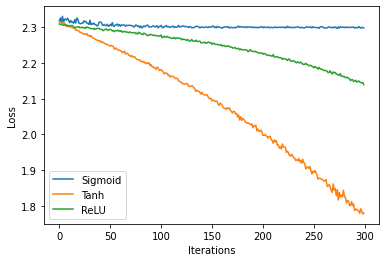

In [ ]:
#compare training loss
plt.plot(metrics_sigmoid['training_loss'],label='Sigmoid')
plt.plot(metrics_tanh['training_loss'],label='Tanh')
plt.plot(metrics_relu['training_loss'],label='ReLU')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

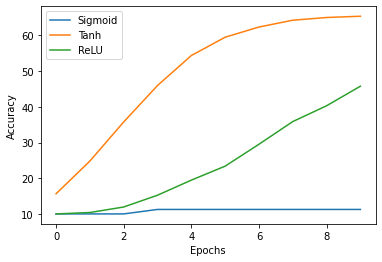

In [ ]:
#compare validaiton accuracy
plt.plot(metrics_sigmoid['validation_accuracy'],label='Sigmoid')
plt.plot(metrics_tanh['validation_accuracy'],label='Tanh')
plt.plot(metrics_relu['validation_accuracy'],label='ReLU')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()